# Week 10 Notebook: Apply Data-Centric AI Principles
The goal of this week's assignment is to apply data-centric AI principles to your modeling project. This week you will keep the final chosen model constant and iterate over the data to improve your prediction performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle


### Read data as dataframe

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

model_folder = os.path.join(parent_dir,"models")
data_folder = os.path.join(parent_dir,"data")

raw_data_folder = os.path.join(data_folder,"raw")
interim_data_folder = os.path.join(data_folder,"interim")
processed_data_folder = os.path.join(data_folder, "processed")

In [3]:
# Paths for feature variables
X_train_scaled_path = os.path.join(processed_data_folder, 'X_train_scaled.parquet')
X_val_scaled_path = os.path.join(processed_data_folder, 'X_val_scaled.parquet')
X_test_scaled_path = os.path.join(processed_data_folder, 'X_test_scaled.parquet')

train_pca_path = os.path.join(processed_data_folder, 'X_train_pca.parquet')
val_pca_path = os.path.join(processed_data_folder, 'X_val_pca.parquet')
test_pca_path = os.path.join(processed_data_folder, 'X_test_pca.parquet')

X_train_poly_path = os.path.join(processed_data_folder, "X_train_poly.parquet")
X_val_poly_path = os.path.join(processed_data_folder, "X_val_poly.parquet")

# Paths for the target variables
y_train_path = os.path.join(processed_data_folder, 'y_train.parquet')
y_val_path = os.path.join(processed_data_folder, 'y_val.parquet')
y_test_path = os.path.join(processed_data_folder, 'y_test.parquet')

In [4]:
# Reading the parquet files as dataframes
X_train_scaled = pd.read_parquet(X_train_scaled_path)
X_val_scaled = pd.read_parquet(X_val_scaled_path)
X_test_scaled = pd.read_parquet(X_test_scaled_path)

y_train = pd.read_parquet(y_train_path)
y_val = pd.read_parquet(y_val_path)
y_test = pd.read_parquet(y_test_path)

X_train_pca = pd.read_parquet(train_pca_path)
X_val_pca = pd.read_parquet(val_pca_path)
X_test_pca = pd.read_parquet(test_pca_path)

### Define the function used to predict and evaluate the model

In [5]:
def evaluate_model(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    mse = rmse**2
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

### Load the Pruned Decision Tree (the winning model)

In [6]:
model_name = 'rt3'
model_path = os.path.join(model_folder, f'{model_name}.pkl')
with open(model_path, 'rb') as file:
    winning_model = pickle.load(file)

### Data Enhancements

In [ ]:
# Function to implement data enhancements
def enhance_data(X):
    # Use this function to add back the time variable
    return X

X_train_enhanced = enhance_data(X_train_scaled.copy())
X_val_enhanced = enhance_data(X_val_scaled.copy())
X_test_enhanced = enhance_data(X_test_scaled.copy())

### Error Analysis on Training Dataset

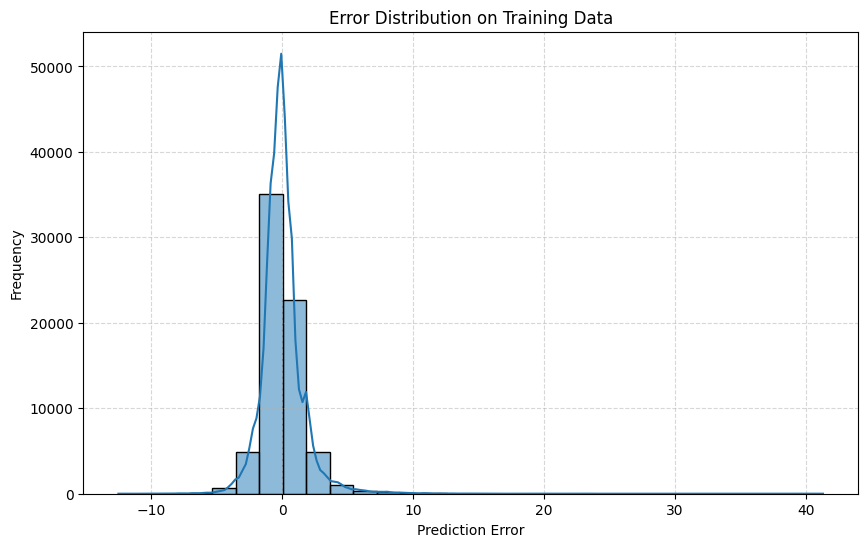

In [8]:
# Convert y_train to a 1-dimensional array if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()

y_train_pred = winning_model.predict(X_train_enhanced)
train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

# Visualize errors
plt.figure(figsize=(10, 6))
sns.histplot(y_train - y_train_pred, bins=30, kde=True)
plt.title("Error Distribution on Training Data")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Model Refitting to the Enhanced Data

In [9]:
winning_model.fit(X_train_enhanced, y_train)

refitted_model_path = os.path.join(model_folder, f'{model_name}_refitted.pkl')
with open(refitted_model_path, 'wb') as file:
    pickle.dump(winning_model, file)

### Evaluate model performance on enhanced datasets

In [10]:
# Training Data Performance
y_train_pred_refitted = winning_model.predict(X_train_enhanced)
train_mse_refitted, train_rmse_refitted, train_r2_refitted = evaluate_model(y_train, y_train_pred_refitted)

# Validation Data Performance
y_val_pred_refitted = winning_model.predict(X_val_enhanced)
val_mse_refitted, val_rmse_refitted, val_r2_refitted = evaluate_model(y_val, y_val_pred_refitted)

# Test Data Performance
y_test_pred_refitted = winning_model.predict(X_test_enhanced)
test_mse_refitted, test_rmse_refitted, test_r2_refitted = evaluate_model(y_test, y_test_pred_refitted)

In [11]:
# Print performance metrics
print("\nRefitted Decision Tree Regression Model - Performance Metrics:")
print("\nTraining Metrics:")
print(f"MSE: {train_mse_refitted:.4f}, RMSE: {train_rmse_refitted:.4f}, R²: {train_r2_refitted:.4f}")

print("\nValidation Metrics:") 
print(f"MSE: {val_mse_refitted:.4f}, RMSE: {val_rmse_refitted:.4f}, R²: {val_r2_refitted:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse_refitted:.4f}, RMSE: {test_rmse_refitted:.4f}, R²: {test_r2_refitted:.4f}")


Refitted Decision Tree Regression Model - Performance Metrics:

Training Metrics:
MSE: 2.6747, RMSE: 1.6354, R²: 0.9997

Validation Metrics:
MSE: 3.0939, RMSE: 1.7589, R²: 0.9996

Testing Metrics:
MSE: 3.0979, RMSE: 1.7601, R²: 0.9997


### Visualize Bias-Variance Tradeoff after Data Enhancements

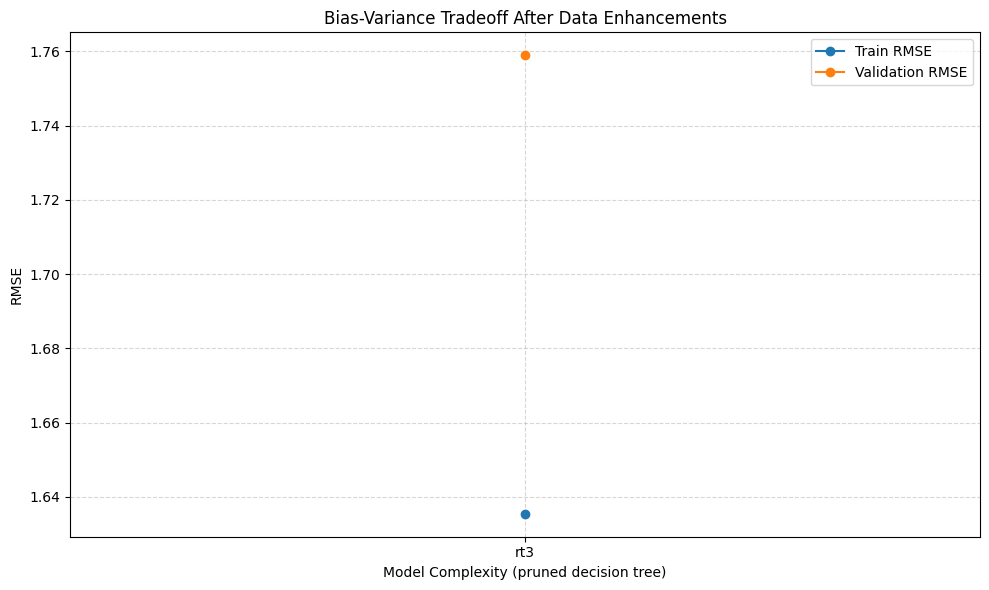

In [12]:
plt.figure(figsize=(10, 6))
complexities = [model_name]  # Update if additional models are refitted for comparison
train_rmse_values = [train_rmse_refitted]
val_rmse_values = [val_rmse_refitted]

plt.plot(complexities, train_rmse_values, marker='o', linestyle='-', label='Train RMSE')
plt.plot(complexities, val_rmse_values, marker='o', linestyle='-', label='Validation RMSE')

plt.xlabel('Model Complexity (pruned decision tree)')
plt.ylabel('RMSE')
plt.title('Bias-Variance Tradeoff After Data Enhancements')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()